[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1iqhmSrBPuHo3e0CqGW9dFw38_ojx5sxR?usp=sharing)

**Table of Contents**

https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Object_Detection_YOLO_ultralytics.ipynb

* [Introduction to Ultralytics](#Introduction-to-Ultralytics)
* [Object Detection with Ultralytics using Pretrained YOLO V8 Models](#Object-Detection-with-Ultralytics-using-Pretrained-YOLO-V8-Models)
* [Non-Max Suppression (NMS) and Intersection Over Union (IoU)](#Non-Max-Suppression-(NMS)-and-Intersection-Over-Union-(IoU))
* [Webcam Local](#Web-cam-Local)
* [Different Vision Tasks](#YOLO-for-Different-Vision-Tasks)

# Introduction to [Ultralytics](https://www.ultralytics.com/)

Ultralytics is a company that offers a variety of AI-based solutions, including the popular YOLO (You Only Look Once) object detection models. Their YOLO models are known for their speed and accuracy, making them suitable for real-time object detection tasks.

The Ultralytics framework provides a convenient and powerful platform for training, evaluating, and deploying object detection models. It is built on top of PyTorch and supports various YOLO versions.

For more detailed information and resources on Ultralytics, you can visit the [Ultralytics official documentation](https://docs.ultralytics.com/).



You can install it with:

```python
%pip install torch torchvision torchaudio
%pip install ultralytics
%pip install opencv-python
```

In [1]:
%pip install -q torch torchvision torchaudio
%pip install -q ultralytics
%pip install -q opencv-python
# # For using the webcam:
# %pip install -q lap
# %pip install -q lapx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.4 MB/s eta 0:00:00


# Object Detection with Ultralytics using Pretrained YOLO Models


## Introduction to Object Detection

Object detection is a crucial area in computer vision, aiming to recognize and locate objects within images. It has vast applications in fields like autonomous driving, surveillance, and image retrieval.

## Introduction to YOLO (You Only Look Once)

YOLO is a state-of-the-art, real-time object detection system that applies a single neural network to the full image. This approach divides the image into regions and predicts bounding boxes and probabilities for each region. YOLO is known for its speed and accuracy, making it a popular choice for real-time applications.


YOLO (You Only Look Once) is a groundbreaking approach in object detection for its unique way of processing images. Traditional object detection methods apply the detection algorithm multiple times to different parts of the image, whereas YOLO applies a single neural network to the entire image. This network divides the image into a grid and predicts bounding boxes and class probabilities for each grid cell.

The advantages of YOLO include:
- **Speed**: By processing the entire image in one evaluation, YOLO significantly reduces computational load, enabling real-time detection.
- **Accuracy**: Despite its speed, YOLO achieves high accuracy, particularly in detecting small objects.



## Choosing the Pretrained YOLO Model

When selecting a pretrained model for your object detection tasks, it's essential to consider the balance between speed and accuracy. The YOLO (You Only Look Once) V8 models come in different sizes to cater to a variety of requirements, from real-time applications to more accuracy-intensive tasks. These models have been trained on the COCO dataset, which is a benchmark in the object detection field.

### [COCO (Common Objects in Context)](https://cocodataset.org/#home)

- **Dataset Overview**: The COCO dataset is a comprehensive collection for object detection, segmentation, and captioning. It features over 200,000 images and 80 object categories, making it one of the most diverse datasets available. This extensive variety allows for the development and testing of robust object detection models like YOLO V8.


### YOLO V8 Model Variants

The following table describes the different variants of the YOLO V8 model, providing a comparison based on size, accuracy, speed, and computational requirements:

| Model  | Size (pixels) | mAP<sub>val</sub> 50-95 | Speed (CPU ONNX, ms) | Speed (A100 TensorRT, ms) | Parameters (M) | FLOPs (B) |
|--------|---------------|------------------------|----------------------|---------------------------|----------------|-----------|
| yolov8n | 640          | 37.3                   | 80.4                 | 0.99                      | 3.2            | 8.7       |
| yolov8s | 640          | 44.9                   | 128.4                | 1.20                      | 11.2           | 28.6      |
| yolov8m | 640          | 50.2                   | 234.7                | 1.83                      | 25.9           | 78.9      |
| yolov8l | 640          | 52.9                   | 375.2                | 2.39                      | 43.7           | 165.2     |
| yolov8x | 640          | 53.9                   | 479.1                | 3.53                      | 68.2           | 257.8     |


### YOLO V9 Model Variants

The following table describes the different variants of the YOLO V9 model, providing a comparison based on size, accuracy, and computational requirements:

| Model   | Size (pixels) | AP<sub>val</sub> 50-95 | AP<sub>val</sub> 50 | AP<sub>val</sub> 75 | Parameters (M) | FLOPs (B) |
|---------|---------------|-----------------------|---------------------|---------------------|----------------|-----------|
| YOLOv9-S | 640          | 46.8                  | 63.4                | 50.7                | 7.2            | 26.7      |
| YOLOv9-M | 640          | 51.4                  | 68.1                | 56.1                | 20.1           | 76.8      |
| YOLOv9-C | 640          | 53.0                  | 70.2                | 57.8                | 25.5           | 102.8     |
| YOLOv9-E | 640          | 55.6                  | 72.8                | 60.6                | 58.1           | 192.5     |







- **Size (pixels)**: The input resolution for the model. All models use the same input resolution but differ in their internal architecture and complexity.
- **mAP<sub>val</sub> 50-95**: The mean Average Precision on the COCO validation dataset, covering IoU thresholds from 0.5 to 0.95. Higher values indicate better accuracy.
- **Speed (CPU ONNX, ms/A100 TensorRT, ms)**: Inference speed measured in milliseconds. Lower times indicate faster performance. The speed is provided for both CPU (using ONNX) and NVIDIA A100 GPU (using TensorRT).
- **Parameters (M)**: The number of trainable parameters in millions. More parameters typically mean a more complex model that can capture detailed features but may be slower and more memory-intensive.
- **FLOPs (B)**: Floating Point Operations per second in billions. This metric gives an idea of the computational demand of the model. Higher values indicate more computational complexity.

When choosing a model, consider the trade-off between speed and accuracy that best fits your application's requirements. Smaller models like YOLOv8n are faster but less accurate, suitable for real-time applications. In contrast, larger models like YOLOv8x provide higher accuracy at the cost of increased inference time, suitable for high-accuracy requirements.

In [25]:
from ultralytics import YOLO
import numpy as np
from PIL import Image

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection, v9 model:  YOLO('yolov9c.pt')

In [3]:
help(model)

Help on YOLO in module ultralytics.models.yolo.model object:

class YOLO(ultralytics.engine.model.Model)
 |  YOLO(model='yolov8n.pt', task=None, verbose=False)
 |  
 |  YOLO (You Only Look Once) object detection model.
 |  
 |  Method resolution order:
 |      YOLO
 |      ultralytics.engine.model.Model
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model='yolov8n.pt', task=None, verbose=False)
 |      Initialize YOLO model, switching to YOLOWorld if model filename contains '-world'.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  task_map
 |      Map head to model, trainer, validator, and predictor classes.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {}
 |  
 |  ----------------------------------------------------------------------


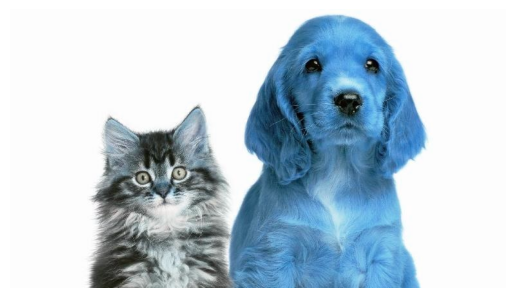

In [4]:
from matplotlib import pyplot as plt
import urllib
import numpy as np
import cv2
import time

url = 'https://akm-img-a-in.tosshub.com/indiatoday/images/story/201812/dogs_and_cats.jpeg?TAxD19DTCFE7WiSYLUdTu446cfW4AbuW&size=770:433'
image_path = "dog-cat.jpg"
urllib.request.urlretrieve(url, image_path)

# Read the image in color mode
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Transform to RGB


plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
results = model(image)
print('Results:\n')
print(results)


0: 384x640 1 cat, 1 dog, 323.1ms
Speed: 16.4ms preprocess, 323.1ms inference, 30.5ms postprocess per image at shape (1, 3, 384, 640)
Results:

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich

In [6]:
print(help(results[0]))

Help on Results in module ultralytics.engine.results object:

class Results(ultralytics.utils.SimpleClass)
 |  Results(orig_img, path, names, boxes=None, masks=None, probs=None, keypoints=None, obb=None, speed=None) -> None
 |  
 |  A class for storing and manipulating inference results.
 |  
 |  Attributes:
 |      orig_img (numpy.ndarray): Original image as a numpy array.
 |      orig_shape (tuple): Original image shape in (height, width) format.
 |      boxes (Boxes, optional): Object containing detection bounding boxes.
 |      masks (Masks, optional): Object containing detection masks.
 |      probs (Probs, optional): Object containing class probabilities for classification tasks.
 |      keypoints (Keypoints, optional): Object containing detected keypoints for each object.
 |      speed (dict): Dictionary of preprocess, inference, and postprocess speeds (ms/image).
 |      names (dict): Dictionary of class names.
 |      path (str): Path to the image file.
 |  
 |  Methods:
 |   

In [7]:
print(results[0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16., 15.])
conf: tensor([0.9503, 0.8851])
data: tensor([[336.9828,   8.7521, 646.4073, 429.2642,   0.9503,  16.0000],
        [118.1919, 147.0612, 347.3672, 429.0800,   0.8851,  15.0000]])
id: None
is_track: False
orig_shape: (433, 770)
shape: torch.Size([2, 6])
xywh: tensor([[491.6951, 219.0081, 309.4246, 420.5121],
        [232.7795, 288.0706, 229.1754, 282.0188]])
xywhn: tensor([[0.6386, 0.5058, 0.4019, 0.9712],
        [0.3023, 0.6653, 0.2976, 0.6513]])
xyxy: tensor([[336.9828,   8.7521, 646.4073, 429.2642],
        [118.1919, 147.0612, 347.3672, 429.0800]])
xyxyn: tensor([[0.4376, 0.0202, 0.8395, 0.9914],
        [0.1535, 0.3396, 0.4511, 0.9909]])


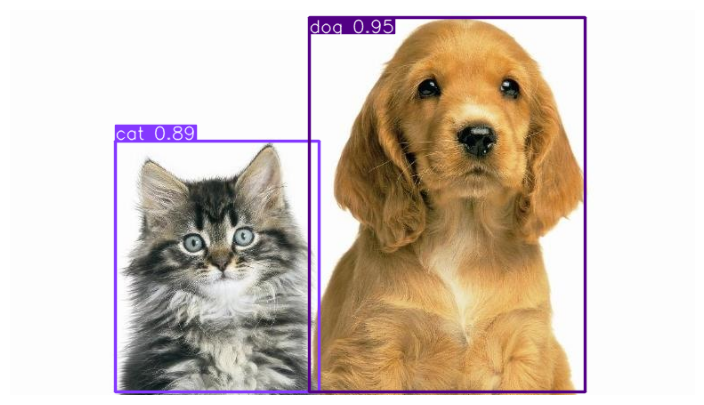

In [8]:
for r in results:
    # Extract the original and annotated images
    original_img = r.orig_img[..., ::-1]
    annotated_image_bgr = r.plot()  # BGR numpy array of predictions
    annotated_image_rgb = annotated_image_bgr[..., ::-1]  # Convert BGR to RGB

    # Plot the annotated image
    plt.figure(figsize=(9, 5))
    plt.imshow(annotated_image_rgb) # RGB PIL image
    plt.axis('off')
    plt.show()

In [9]:
import urllib
import cv2
from matplotlib import pyplot as plt

def download_images(image_urls, plot_images=False):
    """
    Downloads images from the given URLs, converts them to RGB format, and optionally plots them.

    Args:
    image_urls (list of tuples): A list where each tuple contains the image URL and the desired local file path.
    plot_images (bool): If True, the images will be plotted. Defaults to False.

    Returns:
    list: A list of paths where the images have been saved.
    """
    image_paths = []  # Store the local file paths of the images

    for image_url, image_path in image_urls:
        # Download the image from the URL and save it to the local file path
        urllib.request.urlretrieve(image_url, image_path)
        image_paths.append(image_path)  # Add the local file path to the list

        if plot_images:
            # Read the image in color mode
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            # Convert the image from BGR to RGB format
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Plot the image
            plt.figure(figsize=(8, 4))
            plt.imshow(image_rgb)  # Display the image in RGB format
            plt.axis('off')  # Turn off axis labels and ticks
            plt.title(image_path)  # Set the title of the plot as the image path
            plt.show()  # Display the plot

    return image_paths


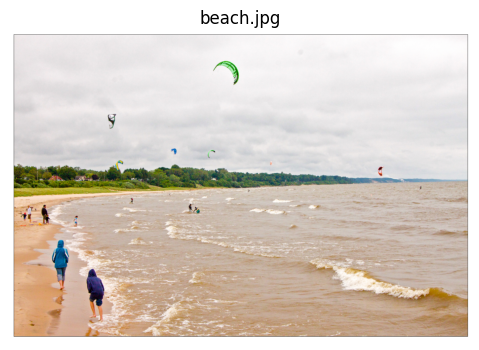

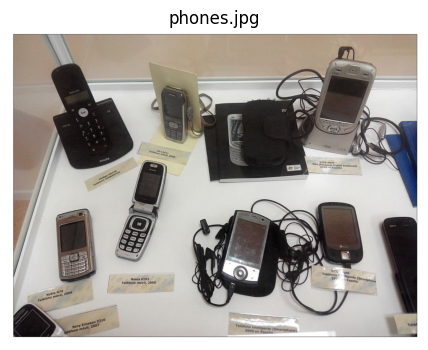

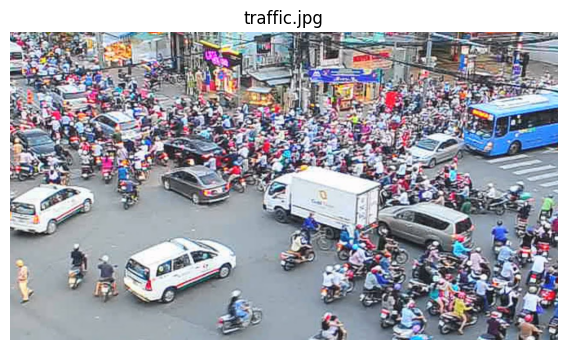

In [10]:
image_urls = [
    ('https://i.ibb.co/R7pRTLy/beach-no-axis.png', 'beach.jpg'),
    ('https://i.ibb.co/jL1kZRF/phones.png', 'phones.jpg'),
    ('https://i.ytimg.com/vi/1ZupwFOhjl4/maxresdefault.jpg', 'traffic.jpg')
]

image_paths = download_images(image_urls, plot_images=True)


0: 640x640 12 persons, 4 kites, 254.4ms
1: 640x640 7 cell phones, 254.4ms
2: 640x640 5 persons, 5 cars, 5 motorcycles, 2 buss, 1 truck, 254.4ms
Speed: 5.9ms preprocess, 254.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


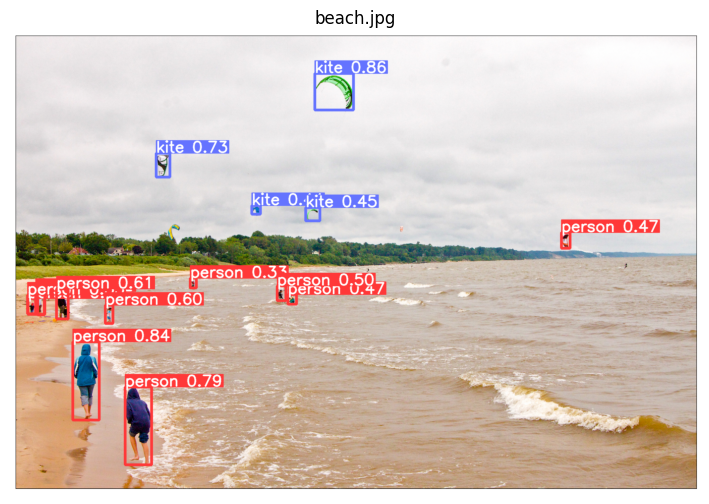

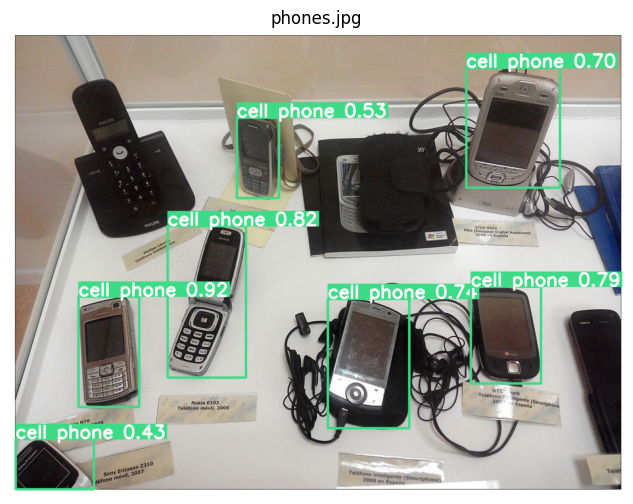

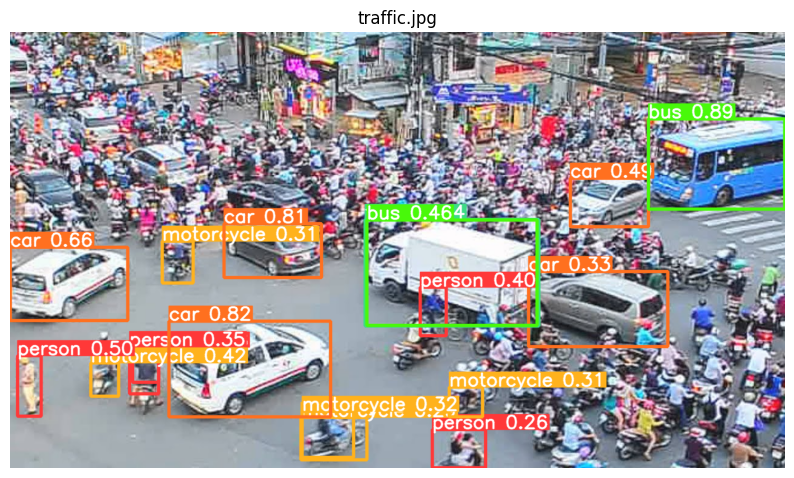

In [11]:
# Run the model
results = model(image_paths)

# Show results
for i, r in enumerate(results):
    # Extract the original and annotated images
    original_img = r.orig_img[..., ::-1]
    annotated_image_bgr = r.plot()  # BGR numpy array of predictions
    annotated_image_rgb = annotated_image_bgr[..., ::-1]  # Convert BGR to RGB

    # Plot the annotated image
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_image_rgb) # RGB PIL image
    plt.axis('off')
    plt.title(image_paths[i])
    plt.show()


### Non-Max Suppression (NMS) and Intersection Over Union (IoU)

Object detection models, often detect multiple bounding boxes around the same object. This leads to redundant detections for the same object, which is undesirable. To resolve this, two key concepts are utilized: Intersection Over Union (IoU) and Non-Max Suppression (NMS). These techniques help refine the boxes surrounding detected objects, ensuring each object is identified accurately and uniquely.

#### Intersection Over Union (IoU)

IoU is a metric used to quantify the percent overlap between two bounding boxes. It is calculated by dividing the area of overlap between the two boxes by the area of their union:

\begin{equation*}
\text{IoU} = \frac{\text{Area of Overlap}}{\text{Area of Union}}
\end{equation*}

For object detection, IoU is utilized to determine how close a predicted bounding box is to the ground truth bounding box. During evaluation, a higher IoU represents a better prediction by the model.

However, in the context of running inference with a model, IoU is crucial for Non-Max Suppression.

#### Non-Max Suppression (NMS)

Non-Max Suppression is a technique to ensure that only the most probable bounding box for an object is preserved while all other redundant boxes are removed. Here’s how it generally works:

1. Select the box with the highest probability of object detection (confidence score).
2. Compute the IoU of this box with all other boxes. If any box has an IoU greater than a set threshold (typically between 0.5 and 0.7), it is suppressed (i.e., removed).
3. Repeat this process for all boxes until each detected object is represented by only one box.

NMS ensures that in cases where multiple boxes predict the same object, only the most accurate one is kept.

#### Usage in Ultralytics YOLO Inference

When you run inference using the Ultralytics YOLO model, you can control the behavior of NMS and IoU through the inference arguments:

- `conf`: This is the confidence threshold. Detections with a confidence score below this threshold are disregarded before NMS. By adjusting this value, you can filter out weak detections early. **(default 0.25)**
- `iou`: This is the IoU threshold for NMS. In areas where multiple bounding boxes overlap, if the overlap (IoU) is greater than this threshold, only the box with the highest confidence is kept. **(default 0.7)**

Here is how you can use these parameters in practice:

```python
from ultralytics import YOLO

# Load a pretrained YOLO model
model = YOLO('yolov8n.pt')

# Run inference with custom confidence and IoU thresholds
results = model.predict(image, conf=0.25, iou=0.7)
```

#### Question 1: Change confidence and IoU thresholds for detecting more objects


0: 640x640 12 persons, 4 kites, 252.3ms
1: 640x640 7 cell phones, 252.3ms
2: 640x640 5 persons, 5 cars, 5 motorcycles, 2 buss, 1 truck, 252.3ms
Speed: 3.4ms preprocess, 252.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


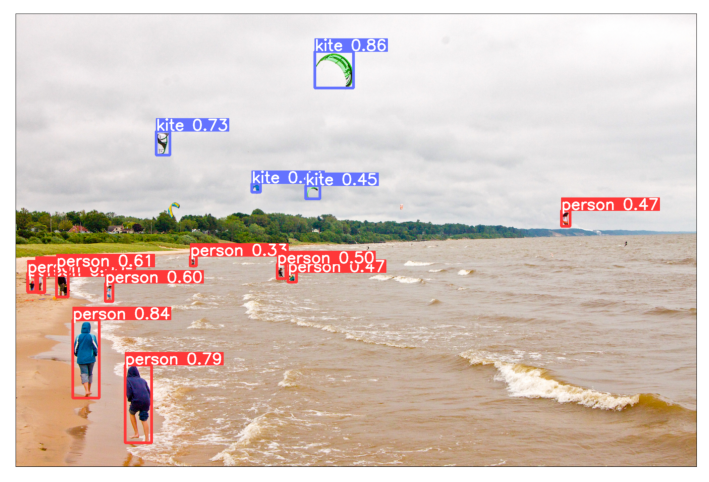

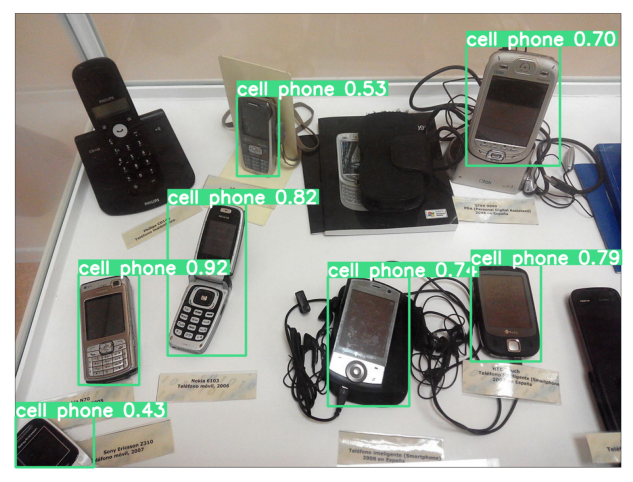

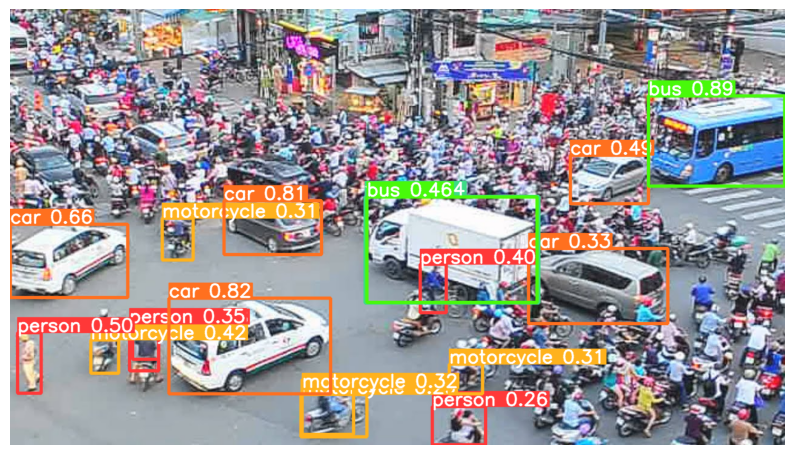

In [12]:
# Run the model
results = model(image_paths, conf=0.25, iou=0.7)

# Show results
for r in results:
    # Extract the original and annotated images
    original_img = r.orig_img[..., ::-1]
    annotated_image_bgr = r.plot()  # BGR numpy array of predictions
    annotated_image_rgb = annotated_image_bgr[..., ::-1]  # Convert BGR to RGB

    # Plot the annotated image
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_image_rgb) # RGB PIL image
    plt.axis('off')
    plt.show()

## Web cam Local

### Detection loop

The detection loop consists of four phases:

- Loading the webcam frame

- Running the image through the model

- Updating the output with the resulting predictions

In [13]:
# from PIL import Image
# from IPython.display import Image as IPyImage

# cap = cv2.VideoCapture(0)
# time.sleep(1)  ### letting the camera autofocus

# axes = None
# NUM_FRAMES = 100  # you can change this
# processed_imgs = []
# for i in range(NUM_FRAMES):
#     # Load frame from the camera
#     ret, frame = cap.read()

#     # Run the model
#     result = model(frame, verbose=False)
#     annotated_image_bgr = result[0].plot()
#     annotated_image_rgb = annotated_image_bgr[:,:, ::-1]  # Convert BGR to RGB

#     img = Image.fromarray(np.uint8(annotated_image_rgb))
#     processed_imgs.append(img)
#     cv2.imshow("test", annotated_image_bgr)
#     cv2.waitKey(1)

In [14]:
# cap.release()
# cv2.destroyAllWindows()

In [15]:
# ## create gif
# processed_imgs[0].save('web_cam.gif',
#                        format='GIF',
#                        append_images=processed_imgs[1:],
#                        save_all=True,
#                        duration=100,
#                        loop=0)

In [16]:
# IPyImage('web_cam.gif', format='png', width=15 * 40, height=3 * 40)

## YOLO for Different Vision Tasks

###  Segmentation

Segmentation models, indicated by the `-seg` suffix (e.g., `yolov8n-seg.pt`), are designed for more detailed analysis. These models not only detect objects but also delineate their exact shapes, segmenting each object from the background and other objects.


In [27]:
model = YOLO('yolov8m-seg.pt')


100%|██████████| 52.4M/52.4M [00:01<00:00, 29.7MB/s]


In [28]:
help(model)

Help on YOLO in module ultralytics.models.yolo.model object:

class YOLO(ultralytics.engine.model.Model)
 |  YOLO(model='yolov8n.pt', task=None, verbose=False)
 |  
 |  YOLO (You Only Look Once) object detection model.
 |  
 |  Method resolution order:
 |      YOLO
 |      ultralytics.engine.model.Model
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model='yolov8n.pt', task=None, verbose=False)
 |      Initialize YOLO model, switching to YOLOWorld if model filename contains '-world'.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  task_map
 |      Map head to model, trainer, validator, and predictor classes.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {}
 |  
 |  ----------------------------------------------------------------------


In [29]:
results = model('traffic.jpg')
results[0].show()  # Display the segmentation results


image 1/1 /content/traffic.jpg: 384x640 7 persons, 1 bicycle, 6 cars, 6 motorcycles, 1 bus, 1 truck, 1329.0ms
Speed: 2.2ms preprocess, 1329.0ms inference, 46.2ms postprocess per image at shape (1, 3, 384, 640)


In [30]:
res = results[0]
res

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair

In [31]:
res.masks

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,

In [32]:
res.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

__________________________________________________
bus


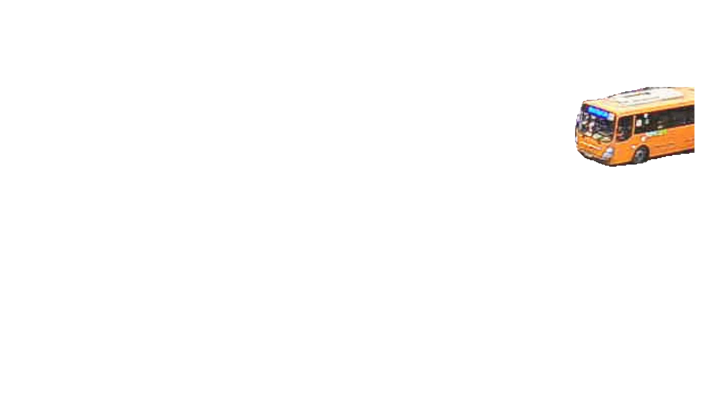

__________________________________________________
car


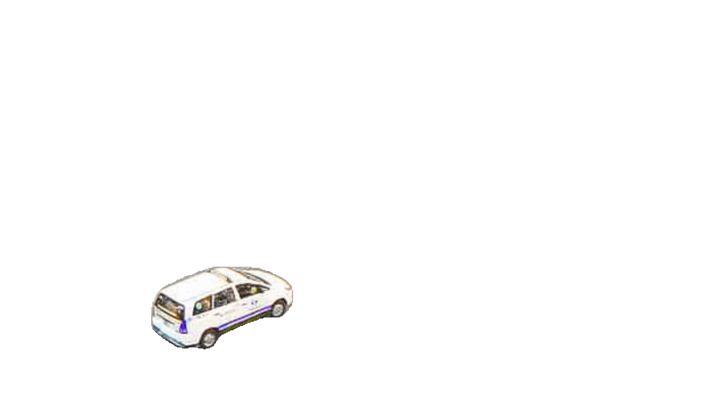

__________________________________________________
car


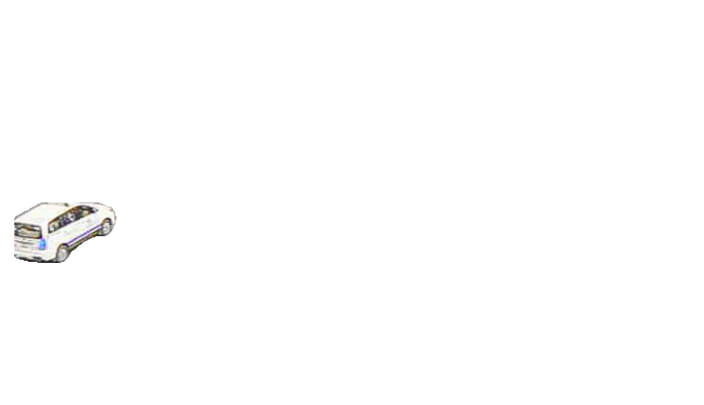

__________________________________________________
car


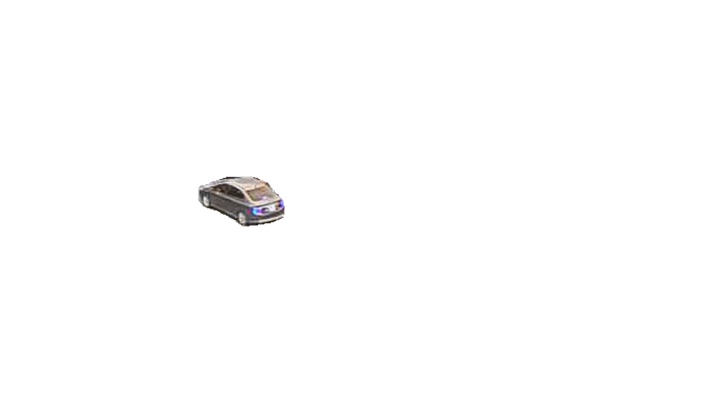

__________________________________________________
truck


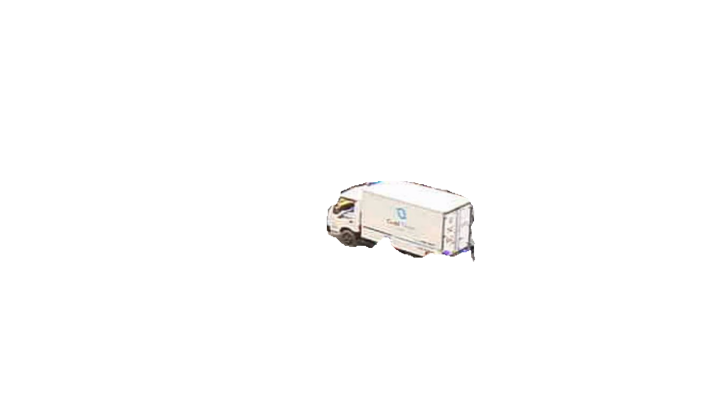

__________________________________________________
car


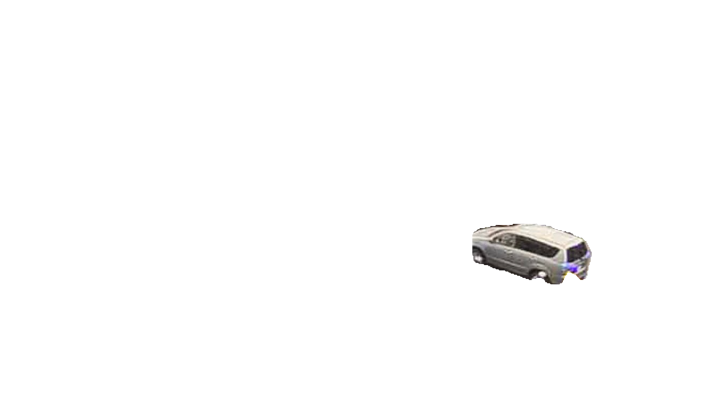

__________________________________________________
motorcycle


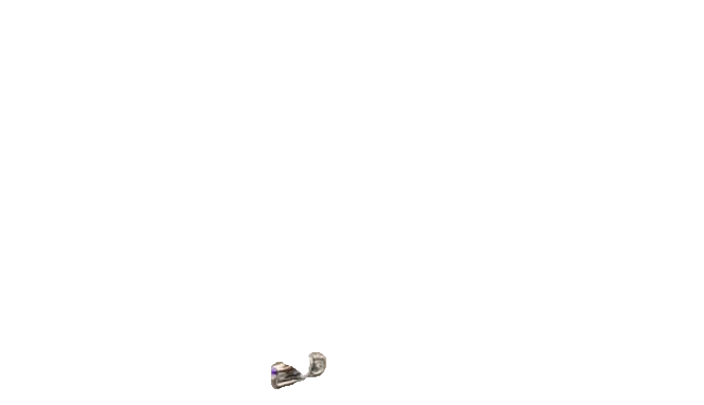

__________________________________________________
car


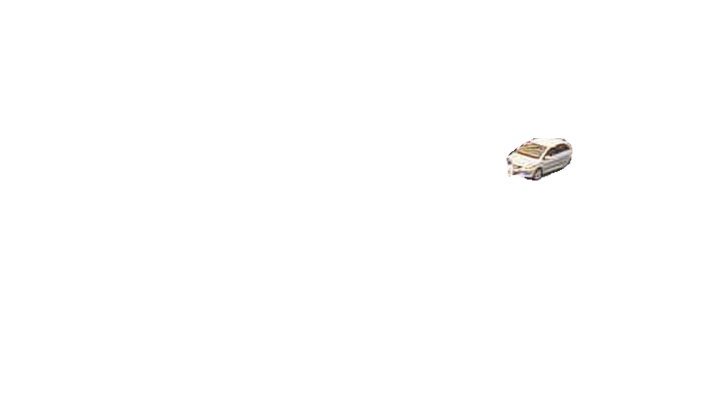

__________________________________________________
person


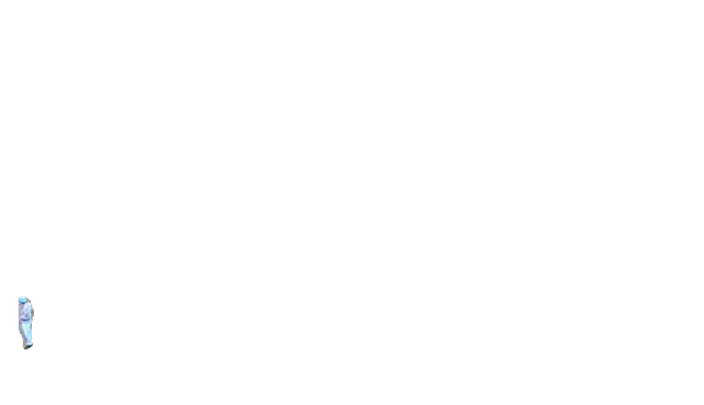

__________________________________________________
person


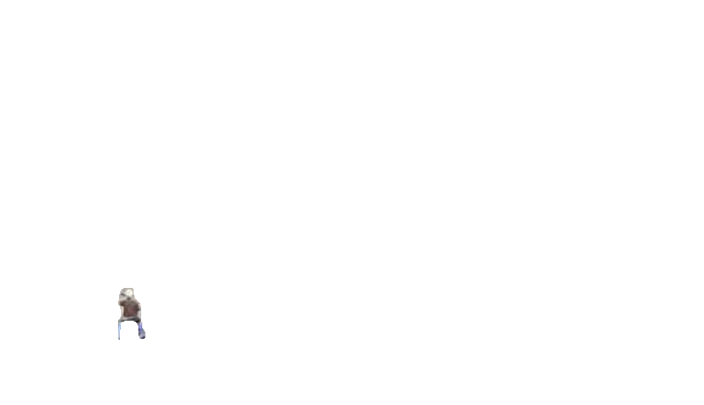

__________________________________________________
motorcycle


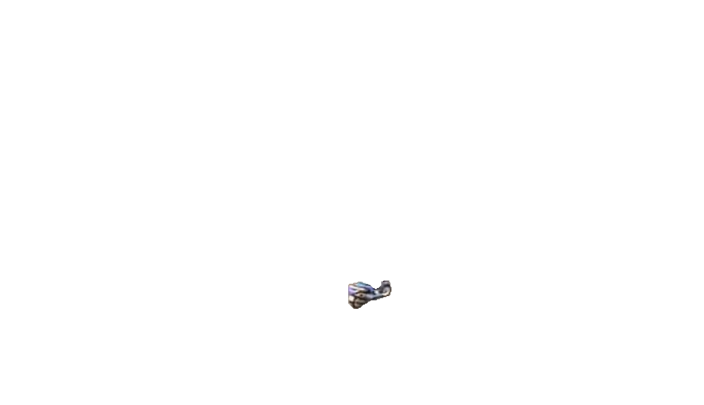

__________________________________________________
person


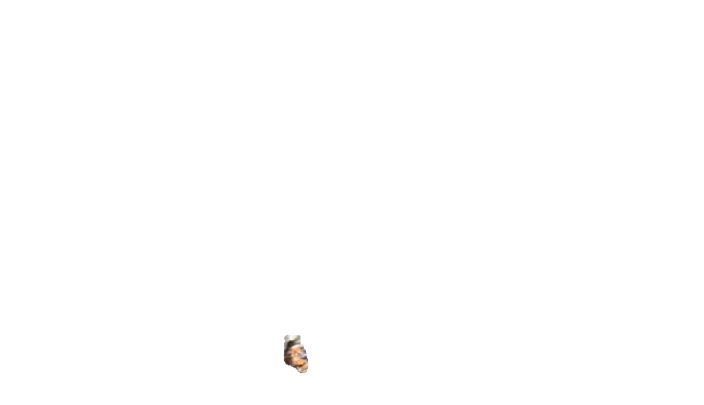

__________________________________________________
person


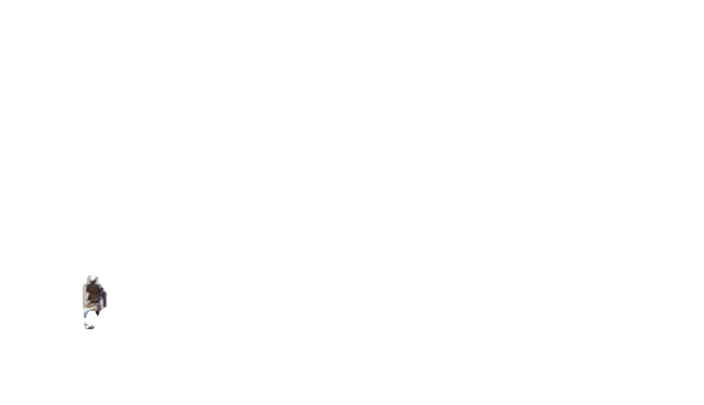

__________________________________________________
person


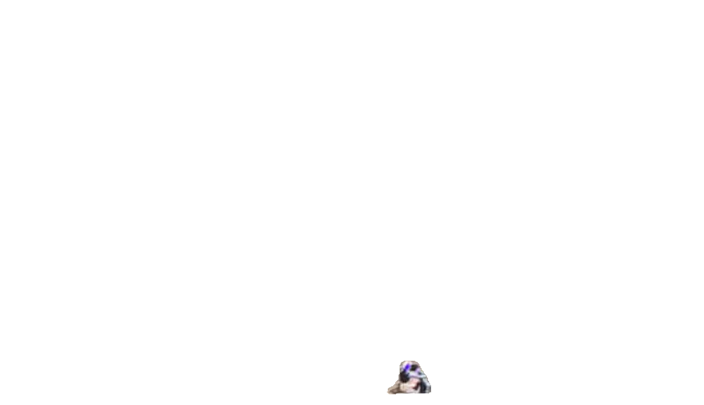

__________________________________________________
motorcycle


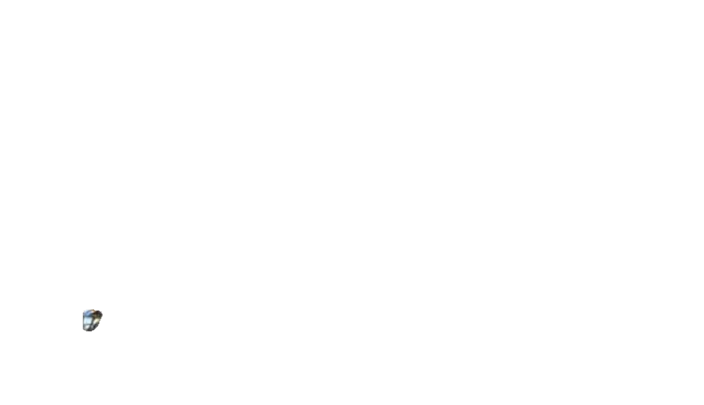

__________________________________________________
motorcycle


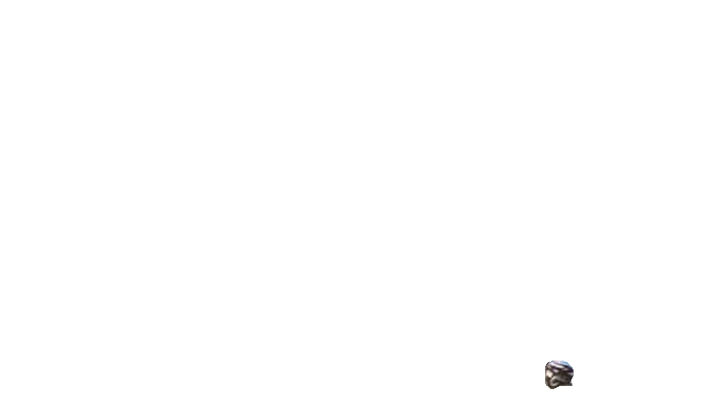

__________________________________________________
person


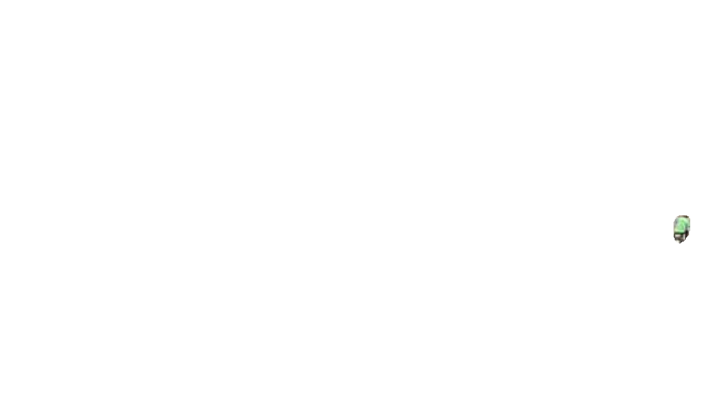

__________________________________________________
motorcycle


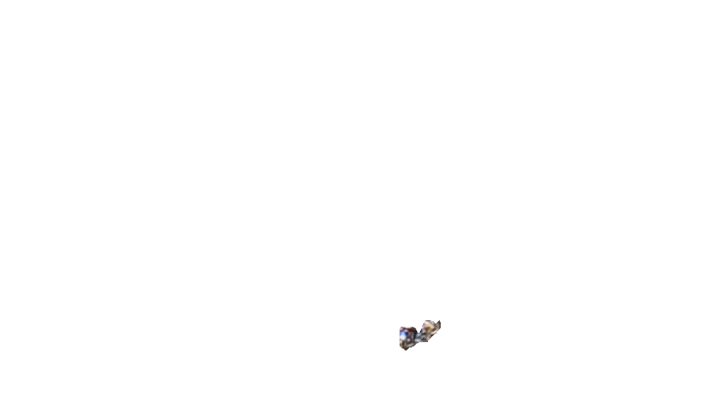

__________________________________________________
person


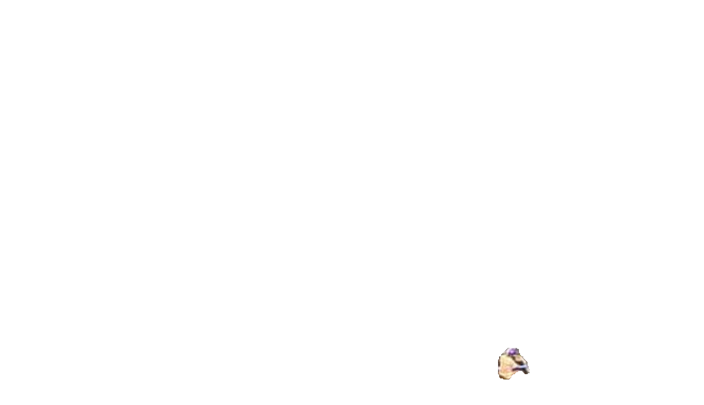

__________________________________________________
motorcycle


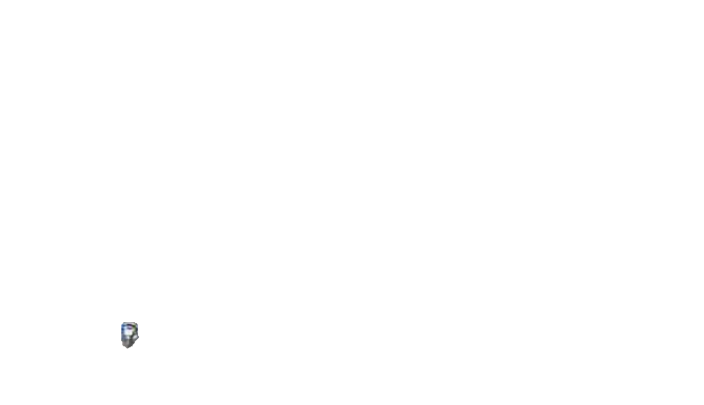

__________________________________________________
car


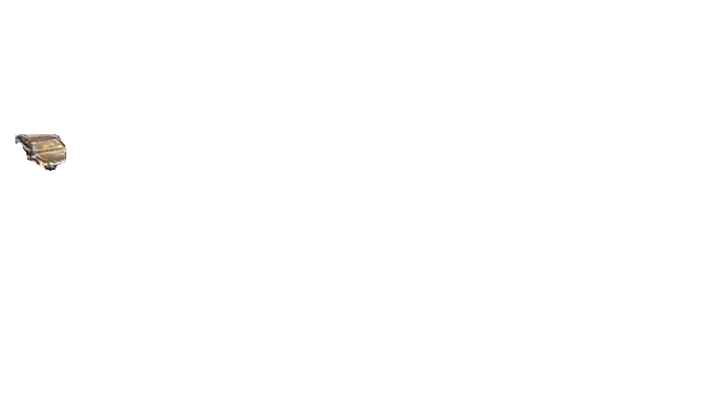

__________________________________________________
bicycle


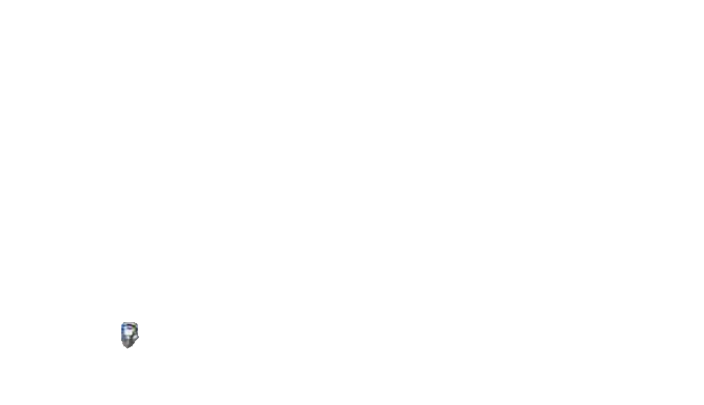

In [33]:
img = np.copy(res.orig_img)

for i in range(len(res.boxes.cls.tolist())):
    label = res.names[res.boxes.cls.tolist()[i]]
    print('_'*50)
    print(label)

    b_mask = np.zeros(img.shape[:2], np.uint8)

    # Create contour mask
    contour = res.masks.xy[i].astype(np.int32).reshape(-1, 1, 2)
    _ = cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)

    # Choose one:

    # OPTION-1: Isolate object with black background
    mask3ch = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)
    isolated = cv2.bitwise_and(mask3ch, img)

    isolated = np.dstack([img, b_mask])

    plt.figure(figsize=(9, 5))
    plt.imshow(isolated) # RGB PIL image
    plt.axis('off')
    plt.show()

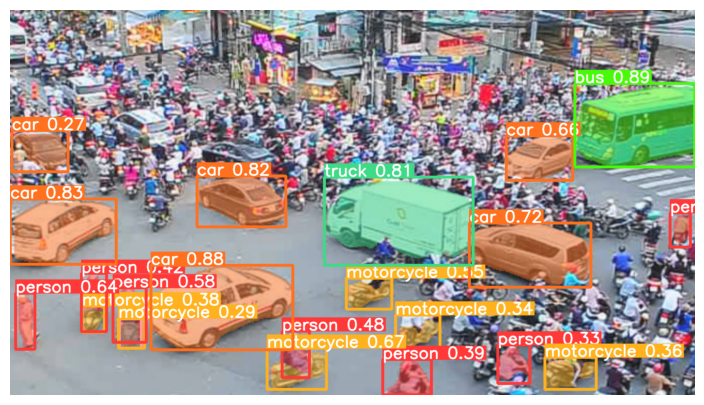

In [34]:
annotated_image_bgr = res.plot()  # BGR numpy array of predictions
annotated_image_rgb = annotated_image_bgr[..., ::-1]  # Convert BGR to RGB

# Plot the annotated image
plt.figure(figsize=(9, 5))
plt.imshow(annotated_image_rgb) # RGB PIL image
plt.axis('off')
plt.show()

### Pose

Pose estimation models, identified by the `-pose` suffix (e.g., `yolov8n-pose.pt`), are specialized in detecting human figures and estimating their postures by identifying key body points.

In [35]:
model = YOLO('yolov8l-pose.pt')

100%|██████████| 85.3M/85.3M [00:01<00:00, 46.6MB/s]


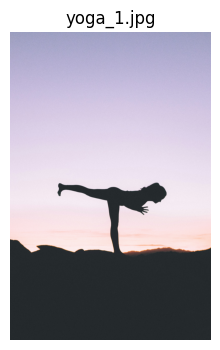

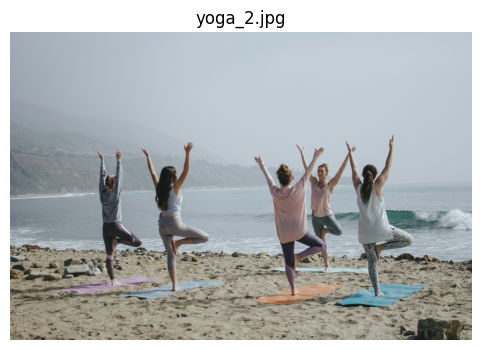

In [36]:
image_urls = [
    (
        'https://images.unsplash.com/photo-1561049501-e1f96bdd98fd?q=80&w=2778&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D',
        'yoga_1.jpg'
    ),
    (
        'https://images.unsplash.com/photo-1545205597-3d9d02c29597?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D',
        'yoga_2.jpg'
    ),
]
image_paths = download_images(image_urls, plot_images=True)


0: 640x640 1 person, 3995.2ms
1: 640x640 5 persons, 3995.2ms
Speed: 6.1ms preprocess, 3995.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


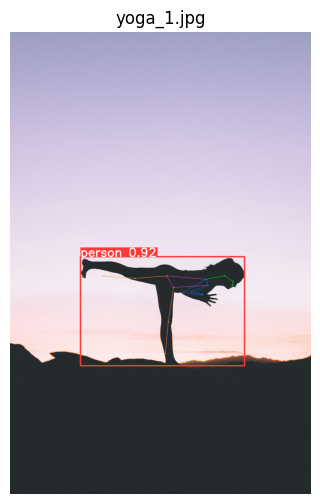

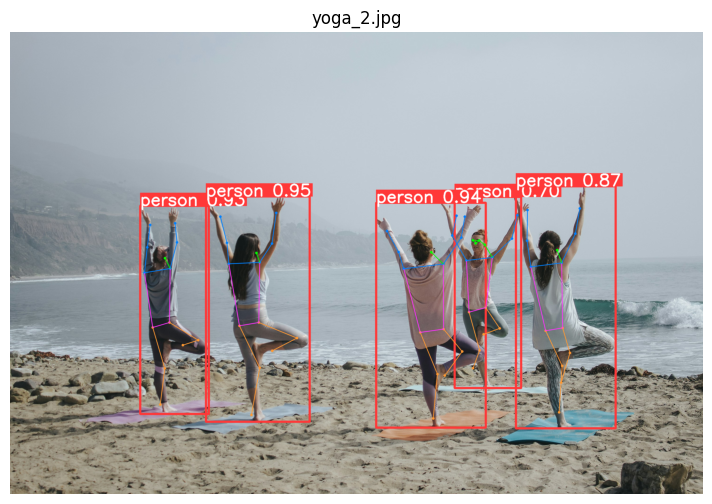

In [37]:
# Run the model
results = model(image_paths)

# Show results
for i, r in enumerate(results):
    # Extract the original and annotated images
    original_img = r.orig_img[..., ::-1]
    annotated_image_bgr = r.plot()  # BGR numpy array of predictions
    annotated_image_rgb = annotated_image_bgr[..., ::-1]  # Convert BGR to RGB

    # Plot the annotated image
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_image_rgb) # RGB PIL image
    plt.axis('off')
    plt.title(image_paths[i])
    plt.show()

In [38]:
r.keypoints.conf.shape

torch.Size([5, 17])

In [39]:
r.keypoints.conf

tensor([[0.1550, 0.0115, 0.0910, 0.2416, 0.9176, 0.9986, 0.9990, 0.9904, 0.9959, 0.9707, 0.9849, 0.9999, 0.9999, 0.9994, 0.9995, 0.9925, 0.9947],
        [0.1070, 0.0116, 0.0642, 0.2850, 0.8952, 0.9967, 0.9987, 0.9767, 0.9944, 0.9172, 0.9687, 0.9996, 0.9997, 0.9977, 0.9984, 0.9773, 0.9849],
        [0.2140, 0.0156, 0.1449, 0.1611, 0.9196, 0.9976, 0.9985, 0.9841, 0.9945, 0.9626, 0.9841, 0.9998, 0.9998, 0.9983, 0.9987, 0.9777, 0.9844],
        [0.0419, 0.0076, 0.0213, 0.3563, 0.7045, 0.9932, 0.9972, 0.9600, 0.9906, 0.8493, 0.9500, 0.9994, 0.9996, 0.9975, 0.9986, 0.9819, 0.9898],
        [0.9913, 0.9876, 0.9484, 0.9316, 0.4973, 0.9982, 0.9837, 0.9862, 0.7569, 0.9801, 0.8099, 0.9972, 0.9920, 0.9941, 0.9831, 0.9790, 0.9474]])

In [40]:
help(r)

Help on Results in module ultralytics.engine.results object:

class Results(ultralytics.utils.SimpleClass)
 |  Results(orig_img, path, names, boxes=None, masks=None, probs=None, keypoints=None, obb=None, speed=None) -> None
 |  
 |  A class for storing and manipulating inference results.
 |  
 |  Attributes:
 |      orig_img (numpy.ndarray): Original image as a numpy array.
 |      orig_shape (tuple): Original image shape in (height, width) format.
 |      boxes (Boxes, optional): Object containing detection bounding boxes.
 |      masks (Masks, optional): Object containing detection masks.
 |      probs (Probs, optional): Object containing class probabilities for classification tasks.
 |      keypoints (Keypoints, optional): Object containing detected keypoints for each object.
 |      speed (dict): Dictionary of preprocess, inference, and postprocess speeds (ms/image).
 |      names (dict): Dictionary of class names.
 |      path (str): Path to the image file.
 |  
 |  Methods:
 |   